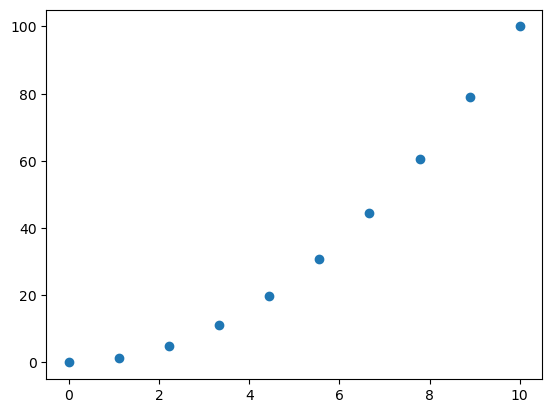

In [55]:
import numpy as np 
import matplotlib.pyplot as plt
x=np.linspace(0,10,10) 
y=x**2
plt.scatter(x,y)

# Interpolation 

In [56]:
from scipy.interpolate import interp1d


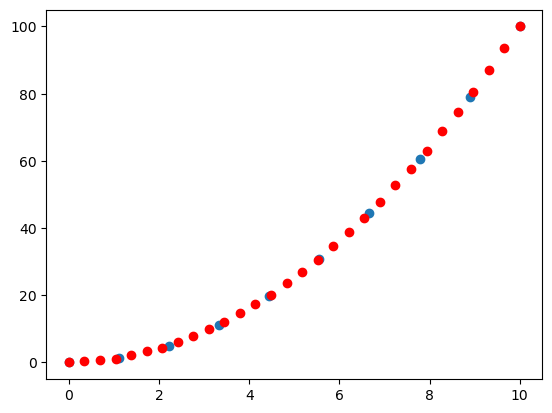

In [57]:
f= interp1d(x,y,kind='linear')
f
new_x=np.linspace(0,10,30)
result=f(new_x)
result
plt.scatter(x,y)
plt.scatter(new_x,result,c='r')

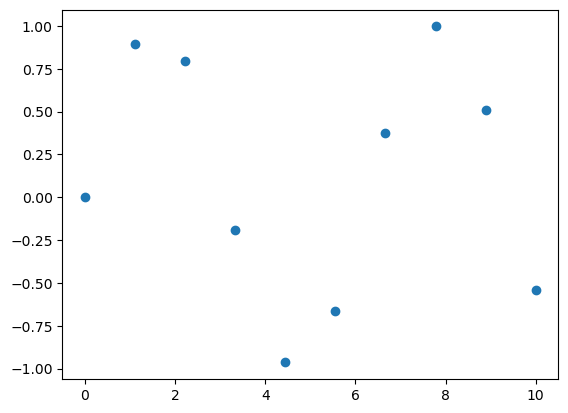

In [58]:
x=np.linspace(0,10,10) 
y=np.sin(x)
plt.scatter(x,y)

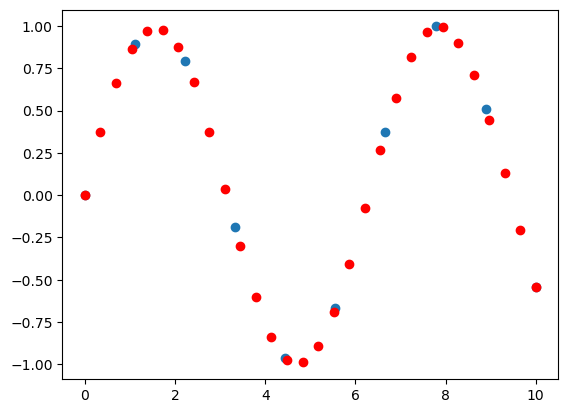

In [59]:
f= interp1d(x,y,kind='cubic')
f
new_x=np.linspace(0,10,30)
result=f(new_x)
result
plt.scatter(x,y)
plt.scatter(new_x,result,c='r')

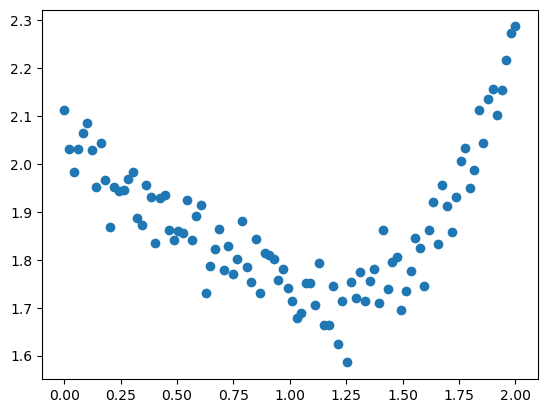

In [60]:
x=np.linspace(0,2,100)
y=1/3*x**3-3/5*x**2+2+np.random.randn(x.shape[0])/20
plt.scatter(x,y)

In [61]:
def f (x,a,b,c,d) :
    return a* x**3+b* x**2 +c*x+d
from scipy import optimize 
params,param_cov=optimize.curve_fit(f,x,y)


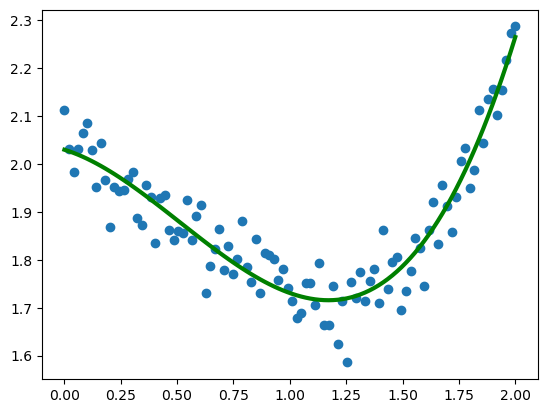

In [62]:
plt.scatter(x,y)
plt.plot(x,f(x,params[0],params[1],params[2],params[3]),c='g',lw=3)

# Minimisation :

In [63]:
def f (x):
    return x**2+ 15*np.sin(x)

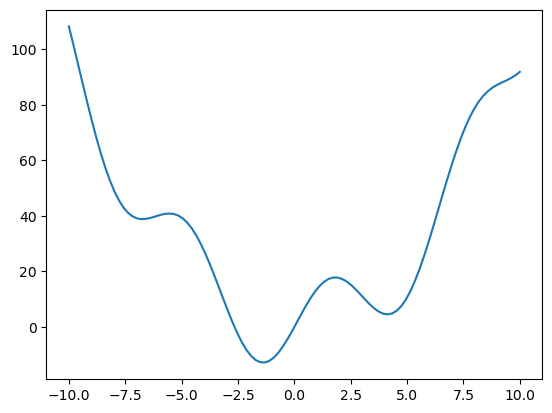

In [64]:
x=np.linspace(-10,10,100)
plt.plot(x,f(x))

In [65]:
#minimum local
optimize.minimize(f,x0=-8)
#minimum global 
x0=-5
result=optimize.minimize(f,x0=x0).x

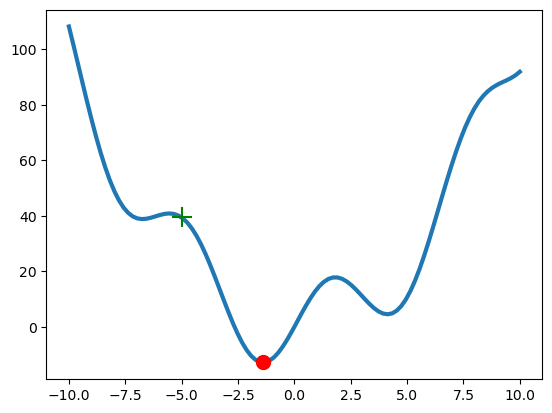

In [66]:
plt.plot(x,f(x),lw=3,zorder=-1)
plt.scatter(result,f(result),s=100,c='r',zorder=1)
plt.scatter(x0,f(x0),s=200,marker='+',c='g',zorder=1)
plt.show()

[-0.78539916 -2.35619343]


C:\Users\ismai\AppData\Local\Temp\ipykernel_25444\2088705975.py:9: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  result=optimize.minimize(f,x0=x0).x


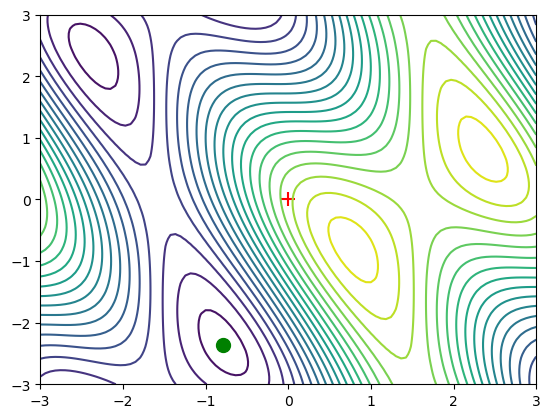

In [91]:
def f (x) :
    return np.sin(x[0])+np.cos(x[0]+x[1])*np.cos(x[0])
x=np.linspace(-3,3,100)
y=np.linspace(-3,3,100)
x,y=np.meshgrid(x,y)
plt.contour(x,y,f(np.array([x,y])),20)
x0=np.zeros((2,1))
plt.scatter(x0[0],x0[1],marker='+',c='r',s=100)
result=optimize.minimize(f,x0=x0).x
plt.scatter(result[0],result[1],c='g',s=100)
print(result)
plt.show()

In [85]:
A=np.array([[1,2,3],[4,5,6]])
A[1]

array([4, 5, 6])

# Signal processing


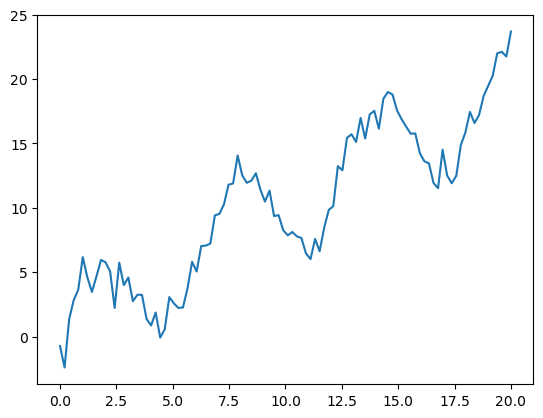

In [97]:
x=np.linspace(0,20,100)
y=x+4*np.sin(x)+np.random.randn(x.shape[0])
plt.plot(x,y)

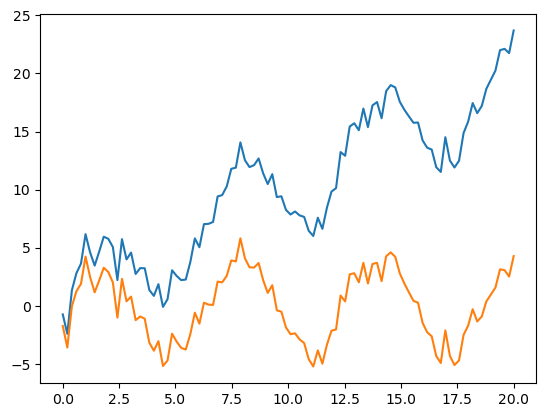

In [99]:
from scipy import signal
#the detrend function removes the linear trend of the function (x in our case)
new_y = signal.detrend(y)
plt.plot(x,y)
plt.plot(x,new_y)


# Fourier Transform 


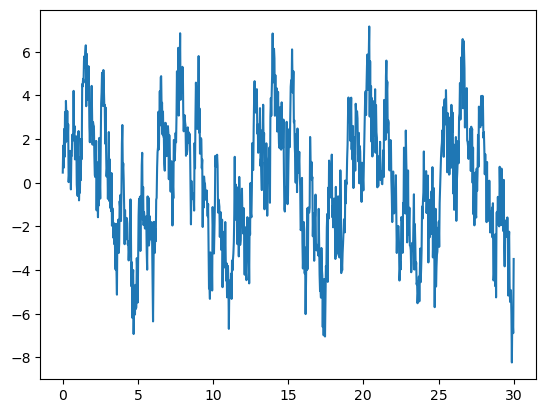

In [112]:
x=np.linspace(0,30,1000)
y=3*np.sin(x)+2*np.sin(5*x)+np.sin(10*x)+np.random.randn(x.shape[0])
plt.plot(x,y)

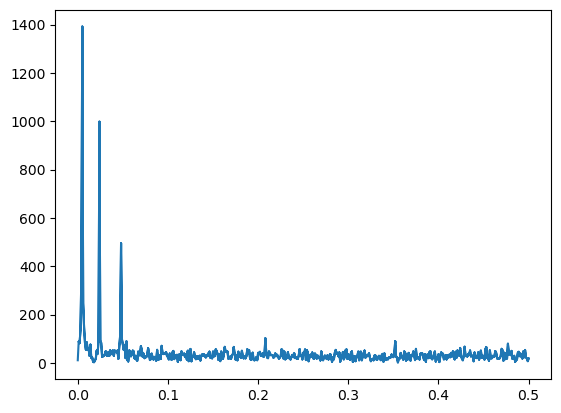

In [113]:
from scipy import fftpack 
fourier=fftpack.fft(y)
power=np.abs(fourier)
frequences=fftpack.fftfreq(y.size)
plt.plot(np.abs(frequences),power)

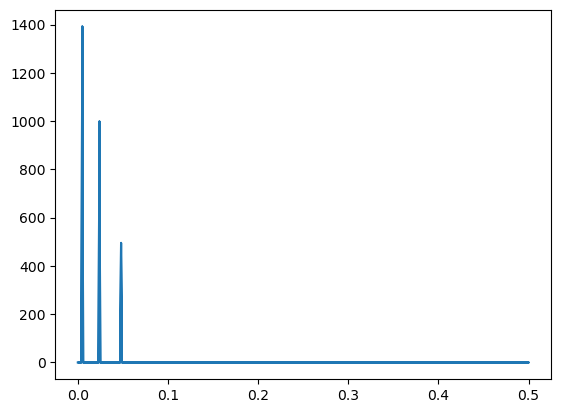

In [115]:
#cleaning
fourier[power<400]=0
power=np.abs(fourier)
plt.plot(np.abs(frequences),power)

# Inverse transform :


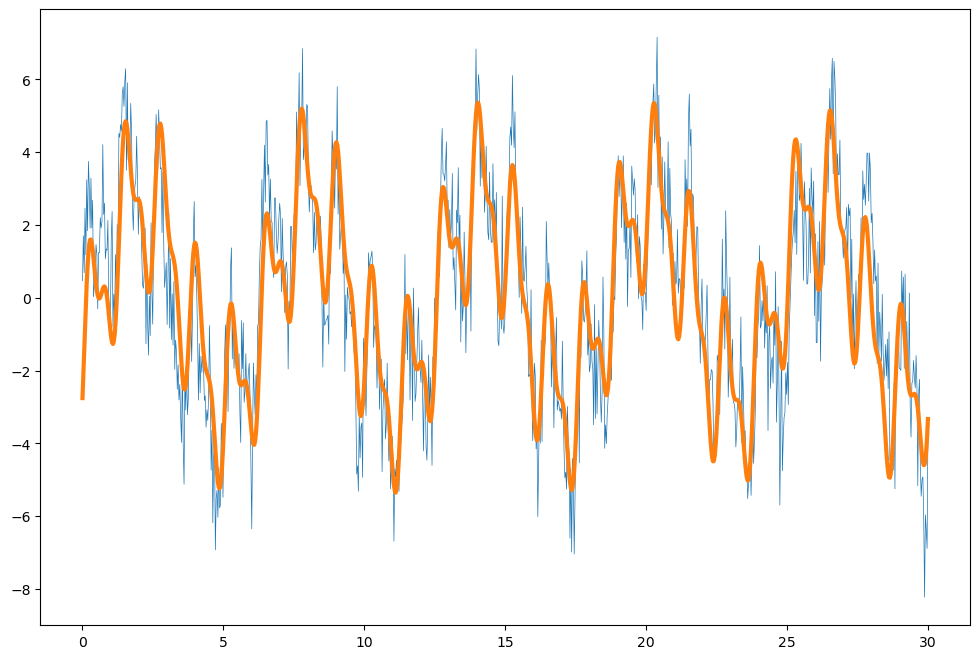

In [116]:
filtered_signal= fftpack.ifft(fourier)
plt.figure(figsize=(12,8))
plt.plot(x,y,lw=0.5)
plt.plot(x,filtered_signal,lw=3)
plt.show() 

# Image processing  

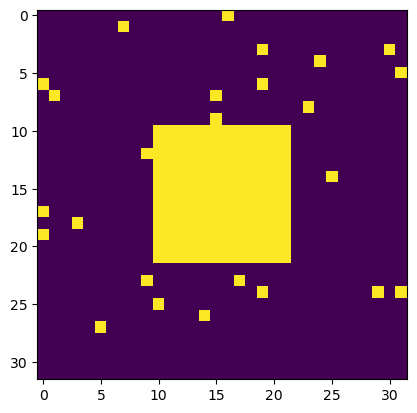

In [120]:
from scipy import ndimage 
np.random.seed(0)
x=np.zeros((32,32))
x[10:-10,10:-10] = 1
x[np.random.randint(0,32,30),np.random.randint(0,32,30)]=1
plt.imshow(x)

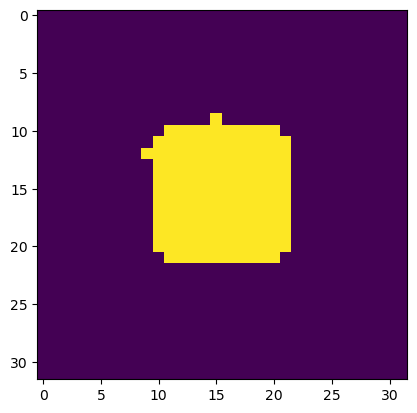

In [121]:
open_x=ndimage.binary_opening(x)
plt.imshow(open_x)
#there is some loss of data

(507, 537)

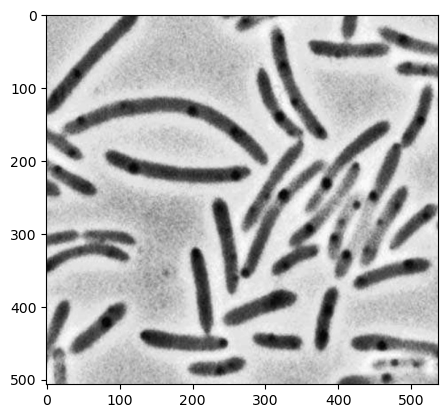

In [135]:
image=plt.imread('images\\bacteria.png')
image=image[:,:,0]
plt.imshow(image,cmap='gray')
image.shape

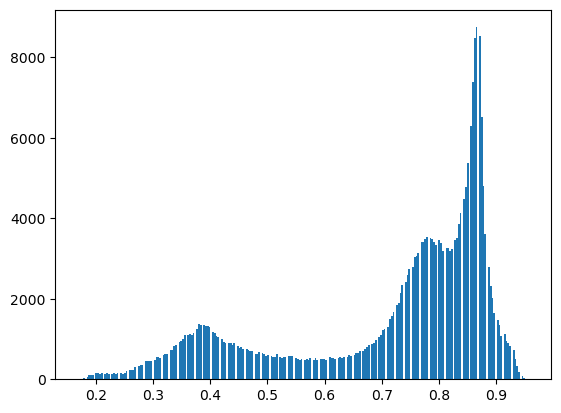

In [136]:
image_2=np.copy(image)
image_2
plt.hist(image_2.ravel(),bins=255)
plt.show()

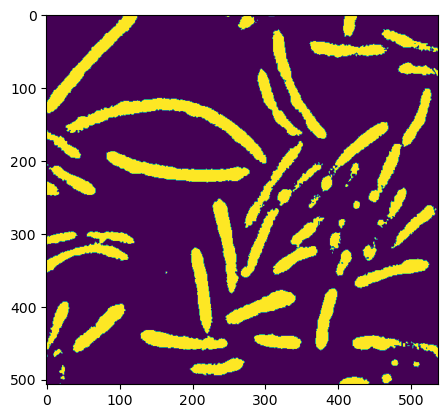

In [139]:
#we want to extract the cells so :
image= image<0.6 
plt.imshow(image)

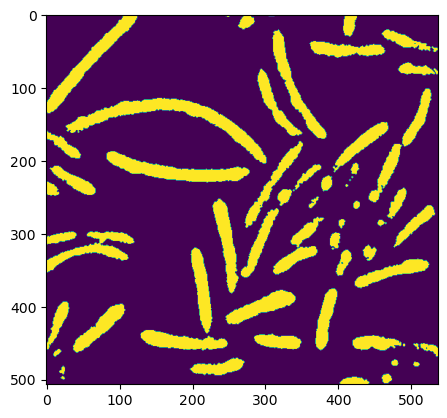

In [140]:
open_x=ndimage.binary_opening(image)
plt.imshow(open_x)

In [141]:
#segmentation :
label_image,n_labels=ndimage.label(open_x)
print(n_labels)

65


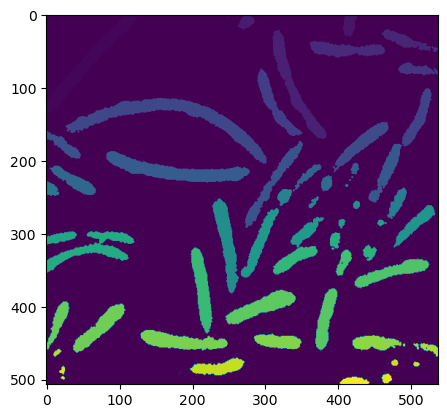

In [142]:
plt.imshow(label_image)

In [143]:
sizes=ndimage.sum(open_x,label_image,range(n_labels))
sizes

array([   0., 2931.,   23.,   26.,  442.,  298., 2277.,  779., 1466.,
         37.,  542.,   27., 1380., 1112., 4877., 1357.,  640., 1576.,
       1126., 3347.,  123.,  357.,  950.,  248.,    5.,    5.,  251.,
         12.,  512.,  300.,    5.,   93., 2025.,   80.,  935., 1333.,
        668.,   79.,   66.,  459., 2120.,  238.,  255.,  993., 1795.,
          8.,  416., 1548., 1324., 1890.,  761., 1554., 1943.,  998.,
        985.,   11.,   36.,  227.,   66., 1039.,   66.,   44.,   56.,
        139.,   19.])

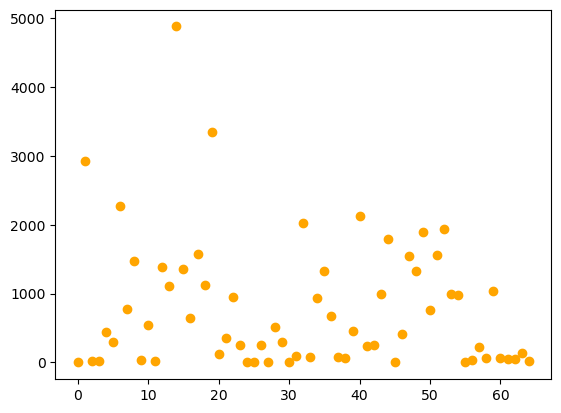

In [144]:
plt.scatter(range(n_labels),sizes,c='orange')